In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Since we can not process categorical data(other than numerical data) we have to convert the data into numerical data---
Like in above case converting yes to 1 and no to 0

In [7]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


But for last column(furnishingstatus) we have more than one value so we can not easily convert them to 1 or 0.

In [9]:
#create a dummy variable to store the values of column in a way which we can easily process
status=pd.get_dummies(df['furnishingstatus'])

In [10]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


We don't need all three columns, because we can work only through 2 columns...
so we can drop one column...

In [12]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [13]:
housing =pd.concat([df,status], axis=1)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# If we can create a new column out of the data, we should create it, this can sometimes improve model quality.... 

In [17]:
housing['areaperbedroom']=housing['area']/housing['bedrooms']

In [19]:
housing['bedroomperbathroom']=housing['bathrooms']/housing['bedrooms']

In [20]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bedroomperbathroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


# Rescaling the feature

This is very important as every value must be in a range so that we won't get wrong results...

So for this we will normalize our data.

In [21]:
#defining a normalization function
def normalize (x):
    return ((x-np.min(x))/(max(x)-min(x)))

#applying normalize to all columns
housing = housing.apply(normalize)

In [22]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bedroomperbathroom'],
      dtype='object')

# Splitting  data into training and testing sets

In [29]:
X= housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bedroomperbathroom']]

Y=housing['price']

In [30]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

# Now lets build a model for p value

In [31]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
lm_1=sm.OLS(y_train,x_train).fit()

In [32]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           4.56e-82
Time:                        02:00:32   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0603      0

# Problem 


Now we are facing a problem called as multi-colinearity which can be solved using VIF (Variance Inflation Factor).

Mathematically VIF= 1 / ( 1 - R^2 )

If R^2 value is high then VIF value is also high this shows corelation between various columns.
Higher the VIF higher the multi-colinearity. By this we can reject the column.
Fome rejecting any columnwe have to follow certain criteria like for example VIF < 5 will be accepted , this changes use case to use case.

But there is a thing that we have to create a balance between VIF and p value i.e. suppose a column is having VIF >5 but its p value is still < 0.05 , so we should not rush it to remove column by watching only VIF we have check its p value also maybe it is useful for our model.

In [33]:
def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame(columns=['var','vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by='vif',axis=0,ascending=False,inplace=False)

In [34]:
#calculating vif value
vif_cal(input_data=housing,dependent_col='price')

,var,vif
13,areaperbedroom,68.71
0,area,57.52
14,bedroomperbathroom,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


# Comparing p value and vif value 

From the above p value description and vif value we can draw out some conslusions like notice the p value of semi-furnished we can observe that it is quite high(0.946) so we can drop the column but after checking vif value(2.61) we can keep it for further use hoping that its p value will decrease...


Now p value for bedroomperbathroom column is high(0.674) and also its vif value(29.25) is very high so without any second thoughts we can drop the column.

# Dropping bedroomperbathroom column


In [36]:
x_train=x_train.drop('bedroomperbathroom',1)

In [37]:
# now fitting second model

lm_2=sm.OLS(y_train,x_train).fit()

In [38]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           6.46e-83
Time:                        02:38:01   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [39]:
#calculating vif again

vif_cal(input_data=housing.drop('bedroomperbathroom',1),dependent_col='price')

,var,vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [40]:
x_train=x_train.drop('bedrooms',1)

In [41]:
lm_3=sm.OLS(y_train,x_train).fit()
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.66e-83
Time:                        02:45:00   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [42]:
vif_cal(input_data=housing.drop(['bedroomperbathroom','bedrooms'],axis=1),dependent_col='price')

,var,vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


In [43]:
x_train=x_train.drop('areaperbedroom',1)
lm_4=sm.OLS(y_train,x_train).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           2.35e-83
Time:                        02:49:30   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [44]:
vif_cal(input_data=housing.drop(['bedroomperbathroom','bedrooms','areaperbedroom'],axis=1),dependent_col='price')

,var,vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [45]:
x_train=x_train.drop('semi-furnished',1)
lm_5=sm.OLS(y_train,x_train).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           2.73e-84
Time:                        02:51:35   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [46]:
vif_cal(input_data=housing.drop(['bedroomperbathroom','bedrooms','areaperbedroom','semi-furnished'],axis=1),dependent_col='price')

,var,vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [47]:
x_train=x_train.drop('basement',1)
lm_6=sm.OLS(y_train,x_train).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.13e-84
Time:                        02:54:30   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [48]:
vif_cal(input_data=housing.drop(['bedroomperbathroom','bedrooms','areaperbedroom','semi-furnished','basement'],axis=1),dependent_col='price')

,var,vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


Now from above summary we can observe that our p value have become quite low now as we have assumed p value to be near 0.01 so all values are neat  it so we have  to stop here and start our prediction.

# Making prediction using our final model i.e. lm_6

In [49]:
x_test_m6=sm.add_constant(x_test)

x_test_m6=x_test_m6.drop(['bedroomperbathroom','bedrooms','areaperbedroom','semi-furnished','basement'],axis=1)

y_pred_m6=lm_6.predict(x_test_m6)

# Model Evaluation

Actual vs predicted

Text(0,0.5,'Sales')

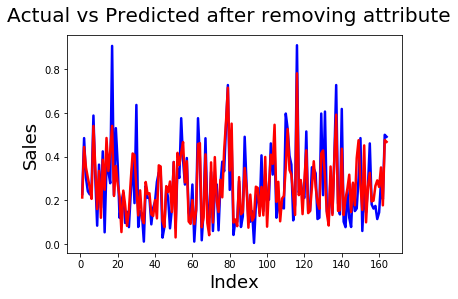

In [53]:
import matplotlib.pyplot as plt
c= [i for i in range(1,165,1)] # generating indexes
fig =plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_m6, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual vs Predicted after removing attribute", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=18)

Further we can also calculate error terms using different graphical strategies and learn some more facts about our model.

# X---------------X------ END--------X---------------------X